# Project Name: Person detection from video and live cam.


## Prepared By: Taslima Akter

## Intern, AI, PACE, University of Winnipeg

## Prepared For: Bit Space Development, Winnipeg, Manitoba, Canada

# Objective of the Project:

-- Main purpose of the project is to create a Machine Learning Model, which will detect person from the recorded video and live camera data. This model will only detect person ignoring all other objectives available in the video or camera data.

-- In this paper, I have developed a technique to identify an object(person/human) considering the deep learning pre-trained model MobileNet for Single Shot Multi-Box Detector (SSD). This algorithm is used for real-time detection, and for webcam feed to detect the purpose webcam which detects the object in a video stream.

# Feasibility of the Study:

Person detection is a variant of object detection used to detect a primary class “person” in images or video frames. Detecting people in video streams is an important task in modern video surveillance systems. The recent deep learning algorithms provide robust person detection results.The detection of a human being is important for abnormal event detection, human gait characterization, people counting, person identification and tracking, pedestrian detection, gender classification.

# Assessment Criteria: 
    
-- How accurately the model is detecting 'person' from the recorded and live video data.

-- Amount of time and computer power consumption.

# Concept of Transfer Learning:

Transfer Learning: transfer learning is a machine learning method where we reuse a pre-trained model as the starting point for a model on a new task. To build my model here, I have used SSD MobilenetV3. This model is trained on more than 330,000 images from the Coco dataset.I have used the weights of the pre-trained model to detect the selected object.

# Machine Learning Algorithm Used to Build the Project:

There are several ML algorithms, such as R-CNN(Region-Based Convolutional Neural Networks), Fast R-CNN, SSD Mobile net and YOLO etc. are available for object detection from images and videos. Here, I have used SSD MobilenetV3 to complete the project. 

SSD MobilenetV3: Mobilenet SSD is an object detection model that computes the output bounding box and object class from the input image. This Single Shot Detector (SSD) object detection model uses Mobilenet as a backbone and can achieve fast object detection optimized for mobile devices.

-- This repository uses pre-trained MobileNet-SSD v3 model for Object Detection https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API

-- The model uses COCO dataset for training https://cocodataset.org/#overview

-- The COCO dataset consists of 80 classes of images (including person), so the objects detected would belong from one of these classes only.


# Project Plan:

# Steps to Build the Model :

    -- Research and select the ML algorithm to use for the video object detection.
    -- Import necessary libraries.
    -- Load the weights of the model.
    -- Configure the pre-trained model.
    -- Check if the pre-trained model is working well with detecting objects from the images.
    -- Write the code to detect only person from the default 80 classes.
    -- Assess the model is correctly identifying person form recorded video and live cam.
    -- Save the result.

# Notes for Train the Model with Custom Dataset :

    -- Prepare the dataset (labeling, annotation, resize, metadata) as like to feed the selected model.
    -- Load the dataset if choose to train the model with customised dataset.
    -- Run the command of training the model with enough epochs.
    -- Use the weight of the trained model to validate and predict the video.

# Importing Necessary Libraries:

In [1]:
#Importing necessary Packages
import cv2
import matplotlib.pyplot as plt

# Loading the Pre-trained Model and Set-up the configuration:

Note: model weights are downloaded from git repo mentioned above and kept these in the same path of of jupyter file from where the program is running. 

In [2]:
#Loading the SSD Model

config_file ='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model ='frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(frozen_model,config_file)

#Setup the Model configuration
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ##255/2=127.5
model.setInputMean(127.5) ## Mobilenet input as a [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 0000012E8BA60F30>

# Display the Default Class Labels of the Model:

Note: As the pre-trained SSD MobilenetV3 model trained with coco dataset, and 'person' are included in the 80 default classes, I have used the default one to detect 'person' for my project. In my other project, I have used custom dataset (PPE dataset using YOLOv8 model, which also use Coco dataset) to train my model as the classes were not in the default model and to get better accuracy.

In [3]:
#Displaying the class labels
classLabels = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
        classLabels = fpt.read().rstrip('\n').split('\n')
        #classLabels.append(fpt.read())      
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# Detect and Classify Image:

First, I have apply the model to classify image to see whether the model is detecting object correctly or not.

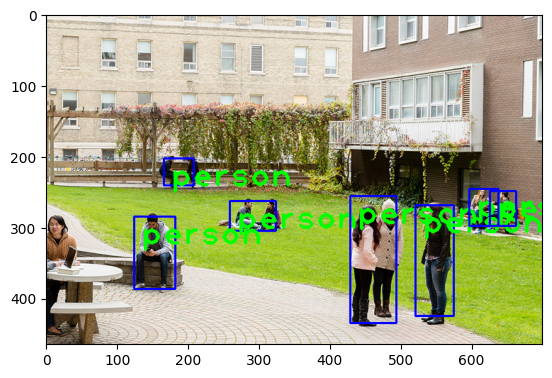

In [4]:
#Read an Image
img = cv2.imread('virtual-campus-tour-8.JPG') ##bgr-blue green red image
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)
font_scale =3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0),thickness=3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Person Detection From Recorded Video:

-- This model will only detect person from the recorded video as I have modified the code for creating box and detecting person only and ignoring other objects of the video. I have tried this model for some of the videos and it's perfectly detected person from the video.

-- Input is given in cap = cv2.VideoCapture('video path'); type of video could be .mp4, avi or others

-- The accuracy of the model can be increased by fine-tuning 'confThreshold' of the model.

-- The output video will be displayed after runing the code and closed after pressing 'q'. The output video will be saved
afterwards.

In [5]:
#Object Detection from recorded videos
#Input videos
#cap = cv2.VideoCapture('pexels-george-morina-6107493.MP4')
#cap = cv2.VideoCapture('2022_0101_145528_585.MP4')
#cap = cv2.VideoCapture('2022_0101_151027_590.MP4')
#cap = cv2.VideoCapture('pexels-everett-bumstead-5535905.MP4')
#cap = cv2.VideoCapture('pexels-george-morina-6093814.MP4')
#cap = cv2.VideoCapture('test_video.mp4')
#cap = cv2.VideoCapture('in.avi')

#Current Input video
cap = cv2.VideoCapture('video.mp4')

cap.set(3,640)
cap.set(4,480)

#Check if the video is open correctly

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('output1_person.mp4', fourcc, 20.0, (640,480))

while True:
    ret, frame = cap.read()
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.50)
    print(ClassIndex)
    
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd==1):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, 
                            fontScale=font_scale, color=(0, 255, 0),thickness=1)

           
            # Write the frame into the
        # file 'output1_person.mp4'
    out.write(frame)
    cv2.imshow("Object detection Project", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

[ 1  1  1  1 31]
[ 1  1  1  1 31]
[ 1  1  1  1  1 31  1]
[ 1  1  1  1 31  1  1]
[ 1  1  1  1 31]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1 1 1]
[1 1 1]
[1 1]
[1 1 1 1]
[1 1 1 1]
[ 1  1  1 31  1  1]
[ 1  1  1  1  1  1  1 31]
[ 1  1  1 31  1  1  1  1]
[1 1 1 1]
[ 1  1  1  1 31  1  1]
[ 1  1  1 31  1]
[1 1 1 1 1 1 1]
[ 1  1  1  1  1  1  1 31]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[ 1  1  1  1  1  1 31  1]
[ 1 31  1  1  1  1]
[ 1 31  1  1  1  1  1]
[ 1  1  1  1  1  1 31  1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1

# Live Person Detection From Webcam:

Here, this model will only detect 'person' from the live camera, as I have modified the code for creating box and detecting person only and ignoring other objects of the live stream. I have tried this model for the default cam of the laptop and external webcam and in both cases, the result were accurately indentified 'person'.


-- After running this program, the cam will be turn on within 30 sec.

-- The accuracy of the model can be increased by fine-tuning 'confThreshold' of the model.

-- The output video will be displayed after runing the code and closed after pressing 'q'.

-- The output video will be saved afterwards.

In [8]:
cap = cv2.VideoCapture(1) #VideoCapture(1)- this 1 will on the webcam
#Check if the video is open correctly
cap.set(3,640)
cap.set(4,480)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('output2_person.mp4', fourcc, 20.0, (640,480))
while True:
    ret, frame = cap.read()
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.50)
    print(ClassIndex)
    
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd==1):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, 
                            color=(0, 255, 0),thickness=1)
                
    out.write(frame)
    cv2.imshow("Object detection Project", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 75]
[ 1 75]
[1]
[1]
[1]
[1]
[1]
[ 1 75]
[ 1 75]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


# Limitations of the Project:

-- The project used the pre-trained model, if it is trained with a custom dataset for person detection, that might be give better output than this one.

-- If another algorithm instead of SSD MobilenetV3 was selected, such as YOLOV8, that also provide percentage of accuracy while detecting a person, which could give a idea to fix the 'confThreshold' value to get better accuracy.

# Challenges and Solutions to Achieve the Goal:

-- Better accuracy could be gained by train the model with custom dataset; but for that, datasets are found in the internet were not well balanced and classified. It requires more time to self collection of data, label and annotate these data for feeding the model as input. Unfortunately, I had shortage of time.

-- Besides, computer power was also an issue. To get good result from model, model has to train with more epochs, which requires high GPU capacity; unfortunately, I was lack of that. This problem can be solved by purchasing GPU packages.


# Observation:

-- Model is perfectly detecting 'person' from recorded video and live cam.

-- As in the project, I have used pre-trained model to detect vehicles, it takes short time to detect and I have been able to run the model on my local PC using CPU.

-- Output is saved to .mp4 format; if output Video is not open from local machine, run the Code, the output video will be displayed.

# Reference:
    
-https://www.youtube.com/watch?v=llBhBSgoWPs

-https://debuggercafe.com/ssdlite-mobilenetv3-backbone-object-detection-with-pytorch-and-torchvision/

-https://github.com/zafarRehan/object_detection_COCO

-Github

-Kaggle  

-Meeting session with the AI team of BSD.

# -------------------------------------Thank You------------------------------------------------